In [262]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import joblib
import subprocess
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from memory_profiler import profile

In [263]:
# Load your dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('../LifeExpectancy.csv')

# Drop the null values
data = data.dropna()

# Split the dataset into X and y
X = data[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles',
          'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP',
          'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = data['Life expectancy']

In [264]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.20, random_state=42)

In [265]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Save the model
y_pred = model.predict(X_test)

In [266]:
# Export the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [267]:
# Get the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 13.538037330790754
R-squared: 0.8093837827599648


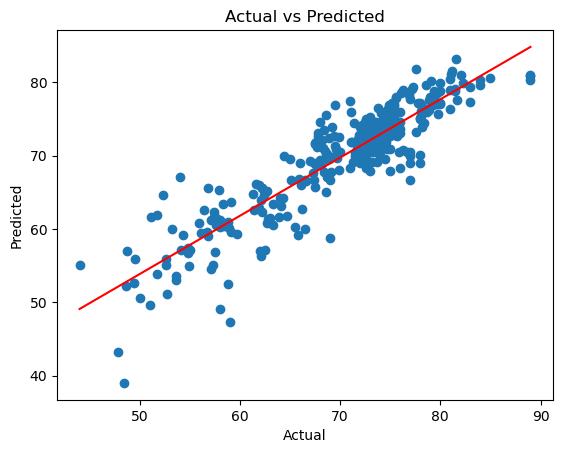

In [268]:
# Plot the actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Show the optimal fit line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.show()

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Filename: statistics/memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    18    143.5 MiB    143.5 MiB           1   @profile()
    19                                         def predict():
    20                                             # Set the current time
    21    143.5 MiB      0.0 MiB           1       current_time = time.time()
    22                                             # Loop the specified number of times
    23    143.5 MiB      0.0 MiB          11       for i in range(10):
    24                                                 # Make a prediction for the specified features.
    25    143.5 MiB      0.0 MiB          10           model.predict([[263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3,0.479, 10.1]])
    26                                                 # Add the current time measurement to the list
 

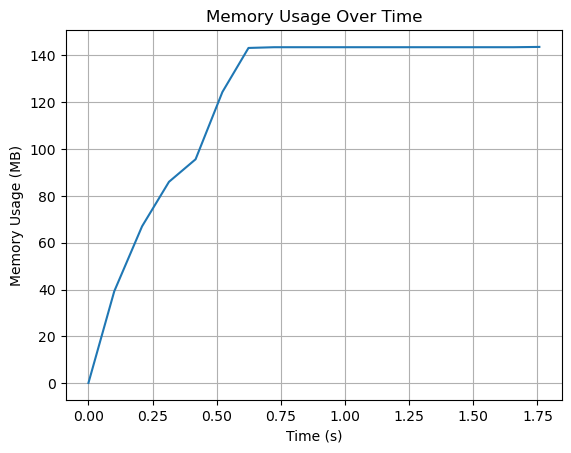

In [269]:
# Run the script with memory profiling using subprocess
subprocess.run(['mprof', 'run', 'statistics/memory.py'])

# List all memory usage data files the output is structured like this: id filename time date
files = subprocess.check_output(['mprof', 'list']).decode('utf-8').strip().split('\n')

# Get the most recent memory usage data file (sorted by id)
filename = files[-1].split()[1]

# Read the memory usage data file
output = open(filename, 'rb').read()

# Clean up the memory usage data file by running it through mprof clean
os.system(f'mprof clean')

# Parse the memory data and extract memory usage values and timestamps
timestamps = []
memory_usages = []
first_timestamp = None

# Iterate through each line in the memory data
for line in output.decode('utf-8').strip().split('\n'):
    # Skip the first line
    if line.startswith('CMDLINE'):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        try:
            # Make the first timestamp 0
            if first_timestamp is None:
                first_timestamp = float(parts[2])
                
            # Calculate the timestamp and memory usage
            timestamp = float(parts[2]) - first_timestamp
            memory_usage = float(parts[1])
            timestamps.append(timestamp)
            memory_usages.append(memory_usage)
        except ValueError:
            pass  # Skip lines that don't have valid data

# Create a memory usage plot
plt.plot(timestamps, memory_usages)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.grid(True)

# Show the memory usage plot
plt.show()



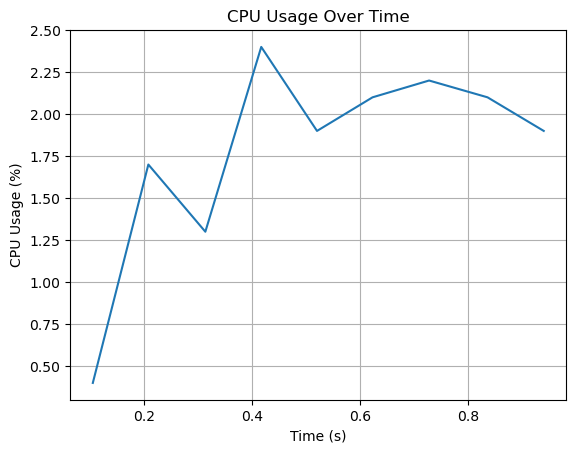

In [270]:
# Open the file cpu_usage_measurements.csv for reading
with open('cpu_usage_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    cpuLines = f.readlines()

# Open the file time_measurements.csv for reading
with open('time_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    timeLines = f.readlines()

# Delete the file time_measurements.csv
os.remove('time_measurements.csv')
# Delete the file cpu_usage_measurements.csv
os.remove('cpu_usage_measurements.csv')

# Make it a float
cpuLines = [float(line.strip()) for line in cpuLines]

timeLines = [float(line.strip()) for line in timeLines]



# Show the data on a plot
plt.plot(timeLines, cpuLines)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.grid(True)